## Anova é um teste paramétrico cujo principal intuito (one way ANOVA) é compara média de três ou mais grupos sobre uma variável quantitativa

Vale entender, que data são seus dados em arrays, groups os grupos analisados. Use_var = 'unequal' e welch_correction = True quando seus dados possuem variâncias diferentes entre grupos (Teste de Levene)

A fórmula de ANOVA se da por:

### Teste ANOVA (Análise de Variância)

A fórmula geral para o teste ANOVA pode ser expressa como:

$$ F = \frac{MS*{\text{entre}}}{MS*{\text{dentro}}} = \frac{\text{variabilidade entre grupos}}{\text{variabilidade dentro dos grupos}} $$

**Onde:**

- $MS_{\text{entre}}$ é a média dos quadrados entre grupos.
- $MS_{\text{dentro}}$ é a média dos quadrados dentro dos grupos.

### Fórmula dos Quadrados para ANOVA

As fórmulas dos quadrados para ANOVA são:

- **Soma Total dos Quadrados (SQT):**
  $$ SQT = \sum (X\_{ij} - \bar{X})^2 $$

- **Soma dos Quadrados Entre Grupos (SQE):**
  $$ SQE = \sum n_j (\bar{X}\_j - \bar{X})^2 $$

- **Soma dos Quadrados Dentro dos Grupos (SQR):**
  $$ SQR = \sum \sum (X\_{ij} - \bar{X}\_j)^2 $$

**Onde:**

- $X_{ij}$ são os valores individuais observados.
- $\bar{X}$ é a média geral de todos os valores.
- $\bar{X}_j$ é a média do grupo $j$.
- $n_j$ é o tamanho do grupo $j$.

### Teste F para ANOVA

O teste F para ANOVA usa a razão F e pode ser interpretado como:

$$ F = \frac{MS*{\text{entre}}}{MS*{\text{dentro}}} $$

onde $MS_{\text{entre}}$ e $MS_{\text{dentro}}$ são definidos como:

$$ MS*{\text{entre}} = \frac{SQE}{k - 1} $$
$$ MS*{\text{dentro}} = \frac{SQR}{N - k} $$

**Onde:**

- $k$ é o número de grupos (ou níveis) do fator.
- $N$ é o número total de observações.
- $SQE$ é a soma dos quadrados entre grupos.
- $SQR$ é a soma dos quadrados dentro dos grupos.

A estatística F compara a variabilidade entre os grupos


In [3]:
from statsmodels.stats.oneway import anova_oneway, effectsize_oneway, confint_effectsize_oneway
import pandas as pd
import numpy as np

data = {
    'species': ['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo'],
    'body_mass_g': [3750, 3800, 3250, 3700, 3450, 3650, 5000, 5200, 5100]
}

df = pd.DataFrame(data)

body_mass = data['body_mass_g']
especies = data['species']

teste_anova = anova_oneway(df['body_mass_g'], groups=df['species'])

In [4]:
print(teste_anova)

statistic = 115.30159070144141
pvalue = 0.000529800723000724
df = (2.0, 3.6172820920880016)
df_num = 2.0
df_denom = 3.6172820920880016
nobs_t = 9.0
n_groups = 3
means = [3600. 3600. 5100.]
nobs = [3. 3. 3.]
vars_ = [92500. 17500. 10000.]
use_var = unequal
welch_correction = True
tuple = (115.30159070144141, 0.000529800723000724)


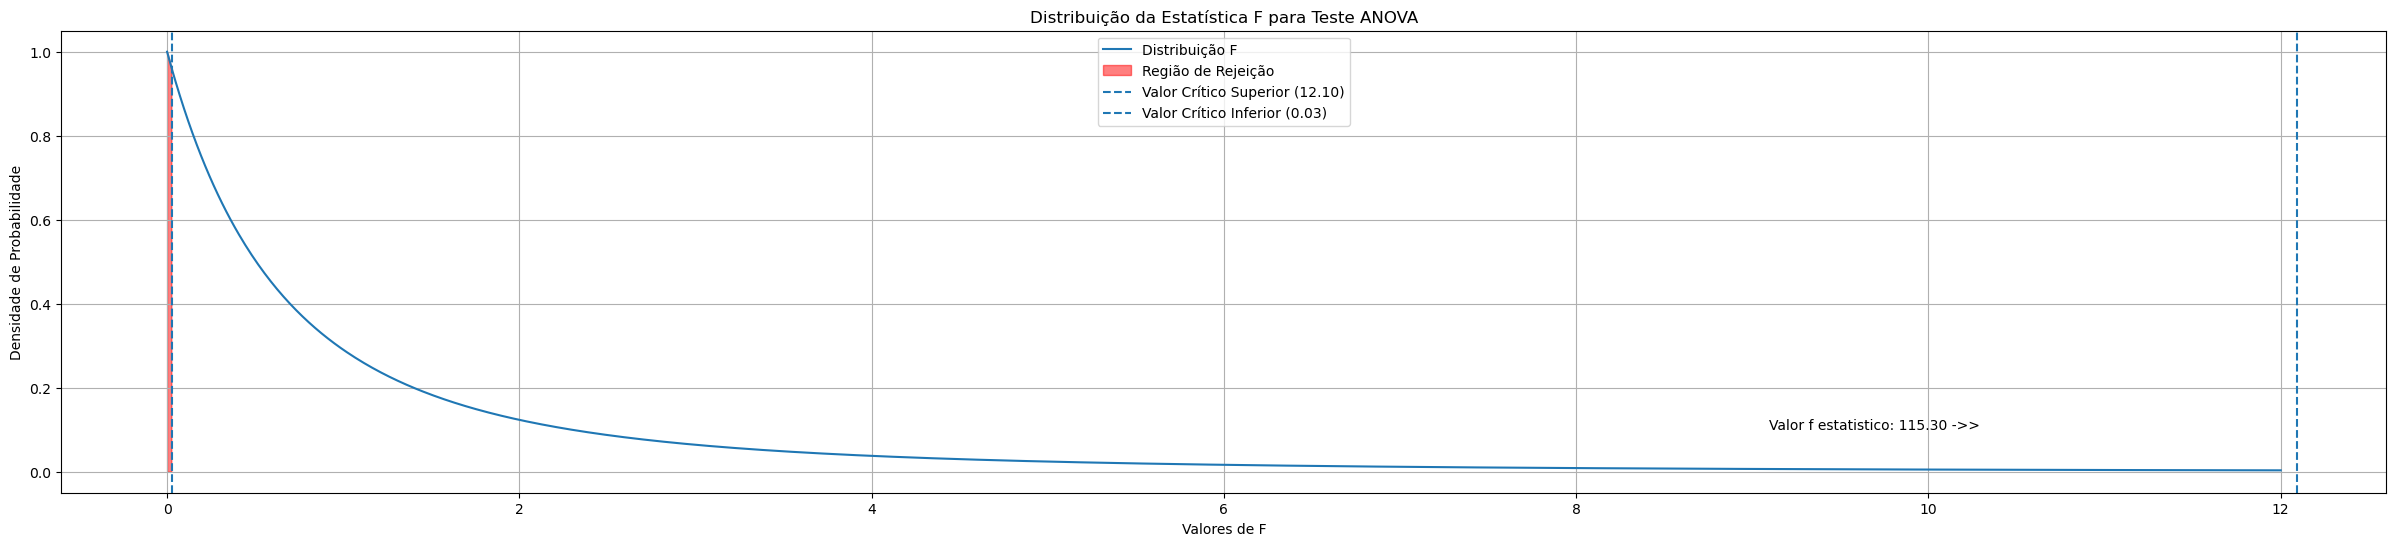

In [8]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

f = 115.30159070144141
DFG = 2.0
DFE = 3.6172820920880016

alpha = 0.05
f_critico_superior = st.f.ppf(1 - alpha/2, DFG, DFE)
f_critico_inferior = st.f.ppf(alpha/2, DFG, DFE)

x = np.linspace(0, 12, 1000)
y_f = st.f.pdf(x, DFG, DFE)

fig, ax = plt.subplots(figsize=(30, 6))

sns.lineplot(x = x, y = y_f, label='Distribuição F')
ax.fill_between(x, 0, y_f, where=(x > f_critico_superior), color='r', alpha=0.5, label='Região de Rejeição')
ax.fill_between(x, 0, y_f, where=(x < f_critico_inferior), color='r', alpha=0.5)
ax.axvline(f_critico_superior, linestyle='--', label=f'Valor Crítico Superior ({f_critico_superior:.2f})')
ax.axvline(f_critico_inferior, linestyle='--', label=f'Valor Crítico Inferior ({f_critico_inferior:.2f})')
ax.set_title('Distribuição da Estatística F para Teste ANOVA')
ax.set_xlabel('Valores de F')
ax.set_ylabel('Densidade de Probabilidade')
ax.text(x = f_critico_superior - 3, y= 0.1, s=f'Valor f estatistico: {f:.2F} ->>', size=10)
ax.legend()
ax.grid(True)

In [9]:
f = 115.30159070144141
df_f = (2.0, 3.6172820920880016)
means = np.array([3600., 3600., 5100.])
nobs = np.array([3., 3., 3.])
vars_ = np.array([92500., 17500., 10000.])
effect_size = effectsize_oneway(means, vars_, nobs, use_var='unequal')
print(f"Tamanho do Efeito: {effect_size}")
ci_effect_size = confint_effectsize_oneway(f, df_f)
print(f"Intervalo de Confiança para o Tamanho do Efeito: {ci_effect_size}")

Tamanho do Efeito: 30.344827586206893
Intervalo de Confiança para o Tamanho do Efeito: f2 = [  3.09417312 101.89763423]
eta2 = [0.75575044 0.9902816 ]
ci_omega2 = [0.58144374 0.98226927]
ci_nc = [ 20.47501641 674.28539023]
ci_f = [ 1.75902619 10.09443581]
ci_eta = [0.86933908 0.99512894]
ci_f_corrected = [ 2.1543583  12.36310848]


Um f² (tamanho do efeito) de 30% significa que aproximadamente 30% da variabilidade na variável dependente (desempenho no teste) pode ser explicada pelas diferenças entre os grupos (fatores). Porém dado que o intervalo de confiança é amplo, é difícil afirmar com precisão qual é o verdadeiro impacto dos grupos (fatores) na variável dependente. Mas sabemos que talvez esse IC amplo pode ser causa de uma comparação entre dois grupos que não tenham grandes diferenças

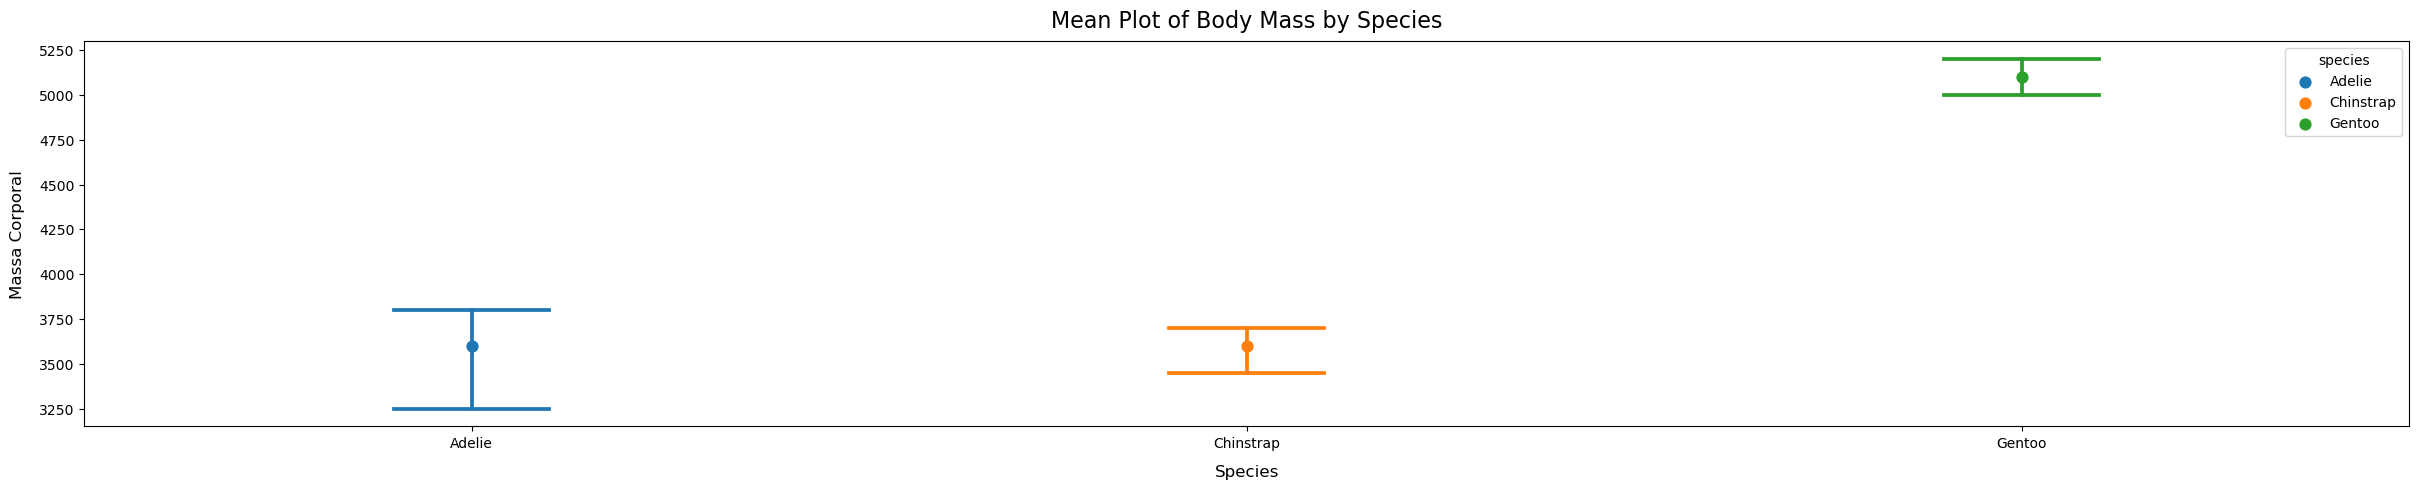

In [10]:
plt.figure(figsize=(30,5))
sns.pointplot(x='species', y='body_mass_g', data=df, capsize=0.2, join=False, hue='species')
plt.title('Mean Plot of Body Mass by Species', fontsize=16, pad=10)
plt.xlabel('Species', fontsize=12, labelpad=10)
plt.ylabel('Massa Corporal', fontsize=12, labelpad=10)
plt.show() 

## O teste de Tukey HSD nos ajuda a identificar pares de grupos com diferenças médias significativas - um bom método pré testes estatísticos

### Teste de Tukey (Intervalo de Confiança para Diferença de Médias)

O teste de Tukey é usado para comparar todas as possíveis combinações de médias em múltiplos grupos. A fórmula para o intervalo de confiança da diferença entre duas médias pode ser expressa como:

$$ \bar{x}_i - \bar{x}\_j \pm q_{\alpha, \, df*{\text{dentro}}} \cdot \sqrt{\frac{MS*{\text{dentro}}}{n}} $$

**Onde:**

- $\bar{x}_i$ e $\bar{x}_j$ são as médias de dois grupos diferentes.
- $q_{\alpha, \, df_{\text{dentro}}}$ é o valor crítico de Tukey para um nível de significância $\alpha$ e graus de liberdade do denominador $df_{\text{dentro}}$.
- $MS_{\text{dentro}}$ é a média dos quadrados dentro dos grupos.
- $n$ é o tamanho das amostras nos grupos comparados.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['body_mass_g'], df['species'])

In [12]:
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2  meandiff p-adj    lower     upper   reject
--------------------------------------------------------------
   Adelie Chinstrap      0.0    1.0 -501.0471  501.0471  False
   Adelie    Gentoo   1500.0 0.0002  998.9529 2001.0471   True
Chinstrap    Gentoo   1500.0 0.0002  998.9529 2001.0471   True
--------------------------------------------------------------


Um teste de Tukey nos ajuda a avaliar isso melhor. Podemos notar quais grupos possuem diferenças significativas entre si, com seu valor-p, IC das diferenças e a diferença média entre cada comparação

Agora um plot_simultaneous() ajuda a visualizar as médias de cada grupo, e seus intervalos de confiança


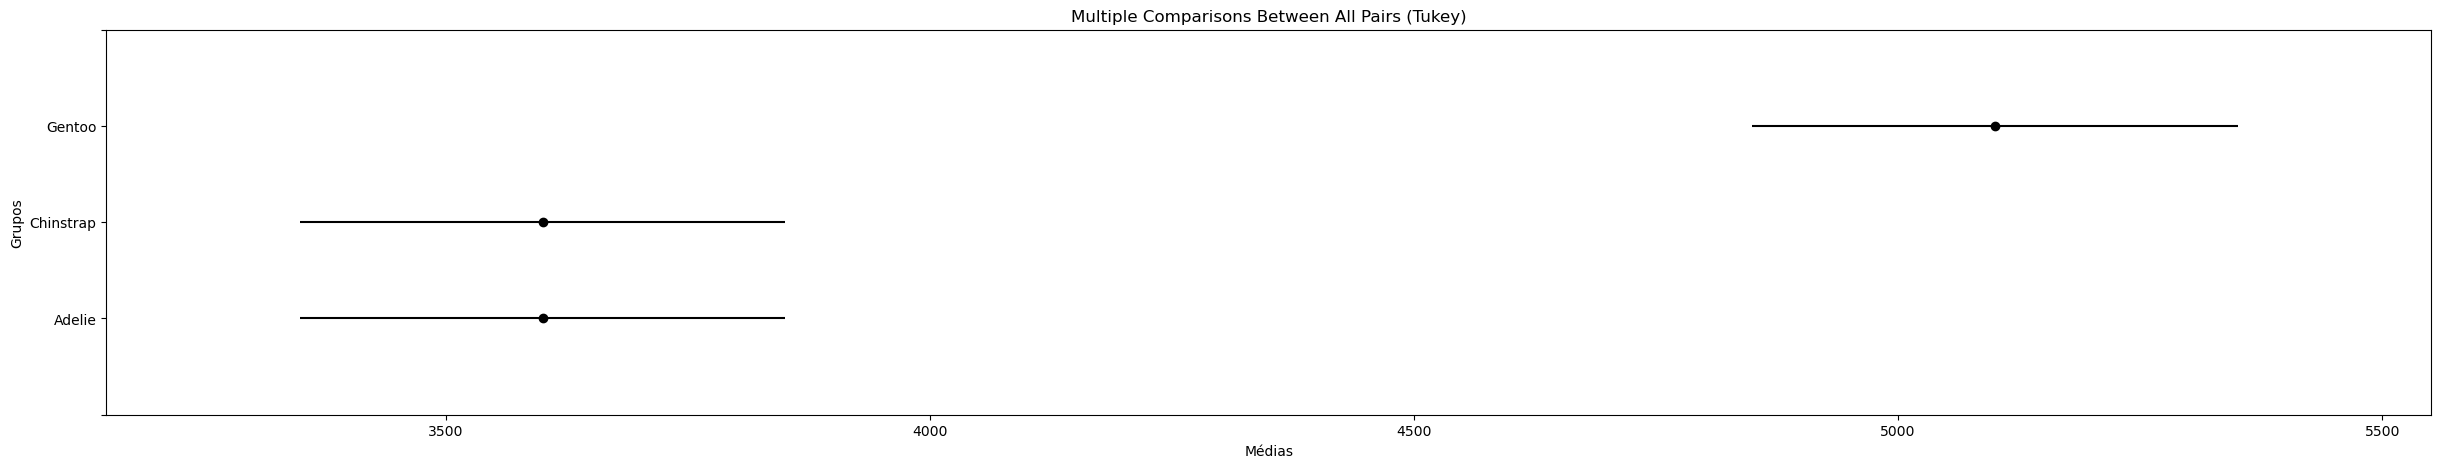

In [13]:
tukey_results.plot_simultaneous(figsize=(30, 5), xlabel='Médias', ylabel='Grupos')
plt.show()